Katie Briggs
DCS 640-302
Assignment 5.2 heat maps, spatial charts, and contour charts 



You need to submit 3 heat maps, 3 spatial charts and 3 contour charts using Tableau or PowerBI, Python and R using the data.

For this assignment I used Costco and PPG files. 

In [1]:
# Import required libaries

import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np
from scipy.stats import kde
import squarify
import seaborn as sns

In [3]:
# Read in Costco File

cost_df = pd.read_csv('costco.csv')
cost_df.head(10)

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217
5,4125 DeBarr Road,Anchorage,Alaska,99508-3115,61.210815,-149.804337
6,3911 Highway 69,Prescott,Arizona,86301-6717,34.548993,-112.395427
7,3901 West Costco Drive,Tucson,Arizona,85741-2864,32.326218,-111.049161
8,6255 East Grant Road,Tucson,Arizona,85712-5834,32.252219,-110.859554
9,17550 N. 79th Ave.,Glendale,Arizona,85308-8711,33.643277,-112.233474


In [4]:
# Read in ppg file

ppg_df = pd.read_csv('ppg2008.csv')
ppg_df.head(10)

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
5,Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,...,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8
6,Kevin Martin,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,...,5.4,0.415,0.6,3.0,3.6,2.7,1.2,0.2,2.9,2.3
7,Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,...,0.1,0.000,3.4,7.5,11.0,1.6,0.8,1.7,1.8,2.8
8,Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,...,2.3,0.364,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7
9,Carmelo Anthony,66,34.5,22.8,8.1,18.3,0.443,5.6,7.1,0.793,...,2.6,0.371,1.6,5.2,6.8,3.4,1.1,0.4,3.0,3.0


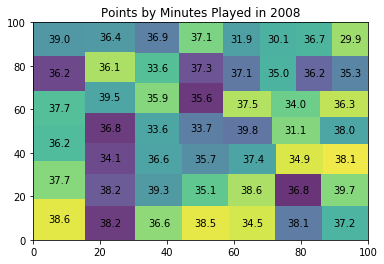

In [5]:
# Create a heatmap of PPG, PTS and Mins Played

squarify.plot(sizes=ppg_df['PTS'], label=ppg_df['MIN'], alpha=0.8)
plt.title('Points by Minutes Played in 2008')
plt.show()

In [6]:
# Create a Spatial Chart with Costco Dataframe

# Find locations
BBox = ((cost_df['Longitude'].min(), cost_df['Longitude'].max(), 
        cost_df['Latitude'].min(), cost_df['Latitude'].max()))
print(BBox)

(-159.3799149, -71.066458, 19.687344, 61.210815000000004)


(19.687344, 61.210815000000004)

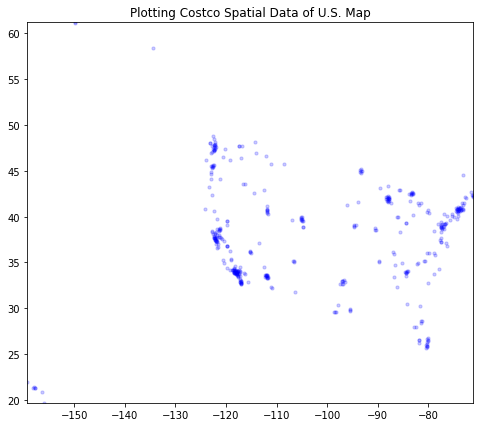

In [11]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(cost_df['Longitude'], cost_df['Latitude'], zorder=1, alpha=0.2, c='b', s=10)

ax.set_title('Plotting Costco Spatial Data of U.S. Map')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

#ax.imshow(ruh_m, zorder = 0, extent = BBox, aspect = 'equal')

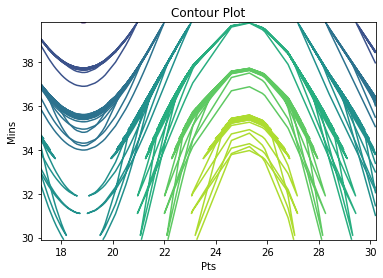

In [12]:
# Create Contour Plot with PPG file 


[X,Y] = np.meshgrid(ppg_df['PTS'], ppg_df['MIN'])
fig, ax = plt.subplots(1,1)
Z = np.cos(X/2) + np.sin(Y/4)
ax.contour(X,Y,Z)
ax.set_title('Contour Plot')
ax.set_xlabel('Pts')
ax.set_ylabel('Mins')
plt.show()